RMSE: 0.2971


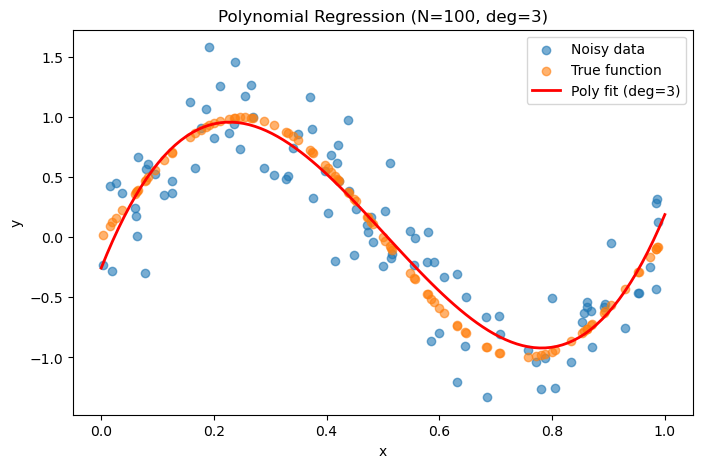

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
rng = np.random.default_rng(seed=50)
size = 100
deg = 3

# Generate data
x = rng.random(size=size)
noise = rng.normal(scale=0.3, size=size)
y_true = np.sin(2 * np.pi * x)
y_smeared = y_true + noise

# Fit polynomial
coeff = np.polyfit(x, y_smeared, deg)

# Calculate RMSE using np.polyval
error = np.sqrt(np.mean((np.polyval(coeff, x) - y_smeared)**2))
print(f"RMSE: {error:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y_smeared, alpha=0.6, label='Noisy data')
plt.scatter(x, y_true, alpha=0.6, label='True function')

X = np.linspace(0, 1, 100)
plt.plot(X, np.polyval(coeff, X), 'r-', lw=2, label=f'Poly fit (deg={deg})')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Polynomial Regression (N={size}, deg={deg})')
plt.show()

Train RMSE: 0.2712
Test RMSE:  0.3006


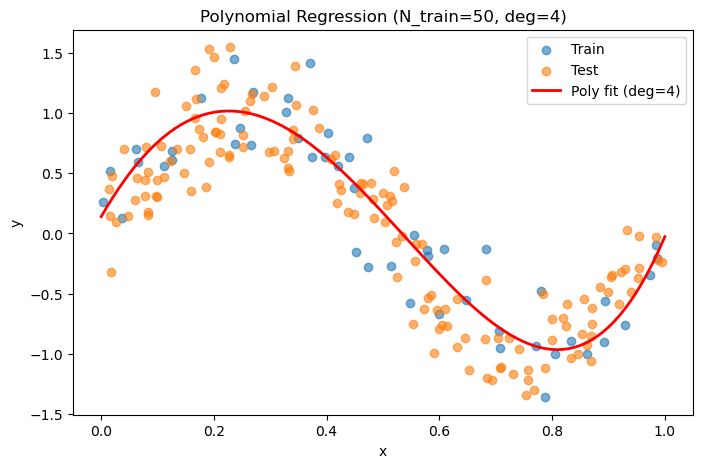

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
rng = np.random.default_rng(seed=50)
size = 200
ratio = 0.25
train_size = int(size * ratio)
test_size = size - train_size
deg = 4

# Generate data
x = rng.random(size=size)
x_train = x[:train_size]
x_test = x[train_size:]

noise = rng.normal(scale=0.3, size=size)
noise_train = noise[:train_size]
noise_test = noise[train_size:]

y_true_train = np.sin(2 * np.pi * x_train)
y_true_test = np.sin(2 * np.pi * x_test)
y_smeared_train = y_true_train + noise_train
y_smeared_test = y_true_test + noise_test

# Fit polynomial
coeff = np.polyfit(x_train, y_smeared_train, deg)  # fixed: was y_smeared


# Calculate errors
error_train = np.sqrt(np.mean((np.polyval(coeff, x_train) - y_smeared_train)**2))
error_test = np.sqrt(np.mean((np.polyval(coeff, x_test) - y_smeared_test)**2))

print(f"Train RMSE: {error_train:.4f}")
print(f"Test RMSE:  {error_test:.4f}")

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_smeared_train, alpha=0.6, label='Train')
plt.scatter(x_test, y_smeared_test, alpha=0.6, label='Test')

X = np.linspace(0, 1, 100)
plt.plot(X, np.polyval(coeff, X), 'r-', lw=2, label=f'Poly fit (deg={deg})')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Polynomial Regression (N_train={train_size}, deg={deg})')
plt.show()

# Activity 1: Polynomial Fitting Analysis

## Part A: Effect of Polynomial Order

As we increase M, we see the following behavior:

**Low M (0, 1):** The fit is too simple. M=0 is just a horizontal line (the mean), M=1 is a straight line. Neither can capture the sinusoidal shape, so we get high bias. The model is underfitting.

**Medium M (3-6):** The fit starts to look reasonable. M=3 can roughly capture the sine wave shape. This is the sweet spot where bias and variance are balanced.

**High M (9+):** The fit goes through more of the data points but starts to wiggle around weirdly, especially near the edges. This is overfitting. The model is fitting the noise, not just the underlying function.

---

## Part B: Comparing σ with $E_{RMS}$ (M=9, N=100)

Results:
- Noise σ used in data generation: **0.30**
- $E_{RMS}$ of the M=9 fit: **0.2971**

The $E_{RMS}$ is slightly lower than σ, which makes sense. The model can't do better than the noise floor. If σ = 0.3, then even a perfect model would have $E_{RMS}$ ≈ 0.3 because that's the irreducible error from the noise we added.

The fact that $E_{RMS}$ ≈ σ tells us that:
1. The M=9 polynomial is flexible enough to capture the true sin(2πx) function
2. The remaining error is basically just the noise we added
3. We're not underfitting (which would give $E_{RMS}$ >> σ)

If we had way less data or higher M, the training $E_{RMS}$ could actually drop below σ, but that would mean we're fitting the noise itself (overfitting).

ln(λ) = -18 | λ = 1.52e-08 | Train RMSE: 0.2642 | Test RMSE: 0.2605
ln(λ) =   0 | λ = 1.00e+00 | Train RMSE: 0.4099 | Test RMSE: 0.3541


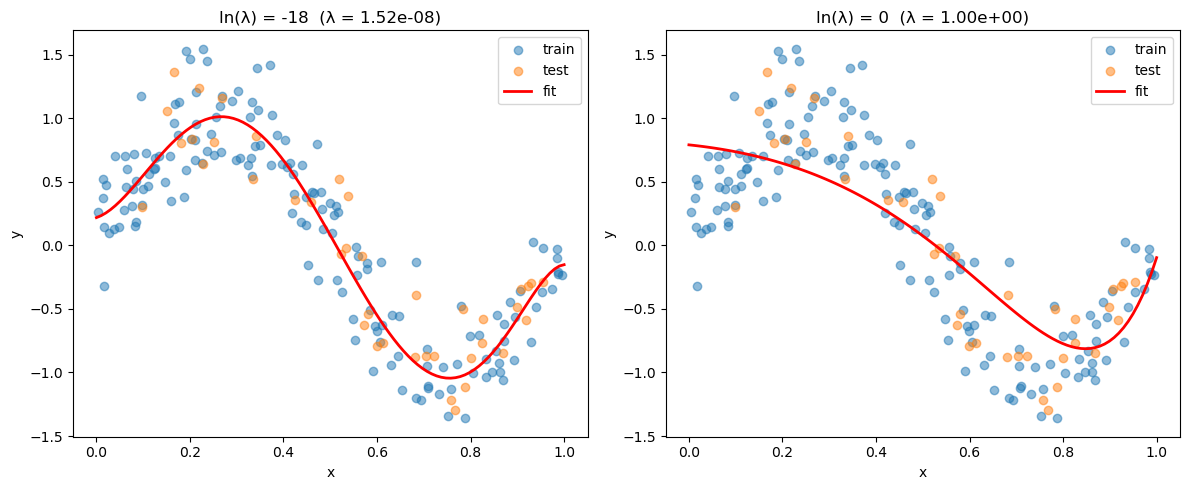

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Data generation
rng = np.random.default_rng(seed=50)
size = 200
ratio = 0.8
train_size = int(size * ratio)
test_size = size - train_size

x = rng.random(size=(size))
x_train = x[:train_size]
x_test = x[train_size:]

gauss = rng.normal(scale=0.3, size=(size))
y = np.sin(2 * np.pi * x_train)
y_test = np.sin(2 * np.pi * x_test)
y_smeared = y + gauss[:train_size]
y_smeared_test = y_test + gauss[train_size:]

# Reshape for sklearn
x_train_reshaped = x_train[:, np.newaxis]
x_test_reshaped = x_test[:, np.newaxis]
X_plot = np.linspace(0, 1, 100)[:, np.newaxis]

degree = 9

# Two lambda values: ln(lambda) = -18 and ln(lambda) = 0
ln_lambdas = [-18, 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, ln_lam in zip(axes, ln_lambdas):
    lambda_param = np.exp(ln_lam)
    
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=lambda_param))
    model.fit(x_train_reshaped, y_smeared)
    
    y_pred_train = model.predict(x_train_reshaped)
    y_pred_test = model.predict(x_test_reshaped)
    
    error_train = np.sqrt(np.mean((y_pred_train - y_smeared)**2))
    error_test = np.sqrt(np.mean((y_pred_test - y_smeared_test)**2))
    
    print(f"ln(λ) = {ln_lam:3d} | λ = {lambda_param:.2e} | Train RMSE: {error_train:.4f} | Test RMSE: {error_test:.4f}")
    
    ax.scatter(x_train, y_smeared, alpha=0.5, label='train')
    ax.scatter(x_test, y_smeared_test, alpha=0.5, label='test')
    ax.plot(X_plot, model.predict(X_plot), 'r-', lw=2, label='fit')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'ln(λ) = {ln_lam}  (λ = {lambda_param:.2e})')
    ax.legend()

plt.tight_layout()
plt.show()

# Activity 2 analysis

## Part A: Why are Fig 1.7 (left) and (right) so different?

Both plots use the same M=9 polynomial and same data. The only difference is the regularization parameter λ.

**Left plot (ln λ = -18):** 
- λ ≈ 1.5 × 10⁻⁸ — very small regularization
- The penalty term λ||w||² is negligible
- The polynomial is basically free to fit the data however it wants
- Result: red curve follows the green sine wave nicely

**Right plot (ln λ = 0):**
- λ = 1 — strong regularization  
- The penalty term λ||w||² dominates the cost function
- The model is penalized heavily for having large weights
- All weights get pushed toward zero
- Result: almost flat line — the model is too constrained to capture the sine

**The underlying reason:**

Ridge regression minimizes:
$$E(\mathbf{w}) = \frac{1}{2}\sum_{n=1}^{N}(y(x_n, \mathbf{w}) - t_n)^2 + \frac{\lambda}{2}\|\mathbf{w}\|^2$$

- When λ is tiny, the regularization term doesn't matter, so we just minimize the squared error → good fit
- When λ is large, the regularization term dominates, so we minimize ||w||² → weights go to zero → flat line

This is the **bias-variance tradeoff**:
- Small λ: low bias, high variance (can overfit)
- Large λ: high bias, low variance (underfits)

# Activity 3
1. The probability of contracting it is $P(A) = 0.001$
2. A test for the disease gives:
   - $P(+|A) = 0.98$ (true positive rate)
   - $P(+|\neg A) = 0.03$ (false positive rate)


We use Bayes' Theorem

$$P(A|+) = \frac{P(+|A) \cdot P(A)}{P(+)}$$

### a) Likelihood Function

The likelihood function is the probability of observing the data (positive test) given the hypothesis (having disease A):

$$\mathcal{L}(A) = P(+|A) = 0.98$$

### b) Bayesian Prior

The prior probability represents our belief about having the disease before observing any test results — simply the base rate in the population:

$$P(A) = 0.001$$

$$P(\neg A) = 1 - P(A) = 0.999$$

### c) Normalization Term (Evidence)

The normalization term $P(+)$ is obtained by decomposing using the **law of total probability**:

$$P(+) = P(+|A) \cdot P(A) + P(+|\neg A) \cdot P(\neg A)$$

Substituting the values:

$$P(+) = (0.98)(0.001) + (0.03)(0.999)$$

$$P(+) = 0.00098 + 0.02997$$

$$P(+) = 0.03095$$

This represents the total probability of getting a positive test result, accounting for both true positives and false positives.


### Posterior Probability Calculation

Applying Bayes' theorem:

$$P(A|+) = \frac{P(+|A) \cdot P(A)}{P(+)} = \frac{0.98 \times 0.001}{0.03095}$$

$$P(A|+) = \frac{0.00098}{0.03095} \approx 0.0317$$



### Conclusion

$$\boxed{P(A|+) \approx 3.2\%}$$

**I probably don't need to worry too much.** Even with a positive test result, there is only a ~3.2% chance I actually have the disease.


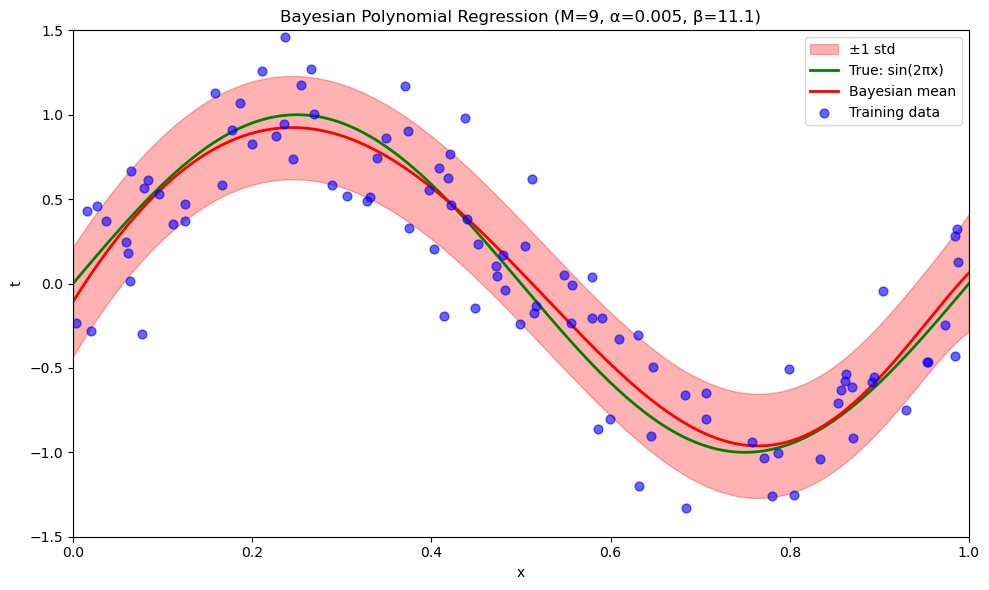

Training RMSE: 0.2952
Noise std used in data generation: 0.3
β = 1/σ² = 1/(0.3)² = 11.11


In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
rng = np.random.default_rng(seed=50)
size = 100
M = 9  # polynomial degree

# Generate data (same as Activity 1)
x = rng.random(size=size)
noise = rng.normal(scale=0.3, size=size)
y_true = np.sin(2 * np.pi * x)
t = y_true + noise  # target values (noisy)

# Bayesian parameters
alpha = 5e-3
beta = 11.1

# Design matrix Phi: each row is [1, x, x^2, ..., x^M]
def design_matrix(x, M):
    return np.column_stack([x**j for j in range(M + 1)])

Phi = design_matrix(x, M)

# Posterior covariance S (Eq. 1.72)
# S^{-1} = alpha * I + beta * Phi^T @ Phi
S_inv = alpha * np.eye(M + 1) + beta * Phi.T @ Phi
S = np.linalg.inv(S_inv)

# Posterior mean of weights (Eq. 1.70)
# m_N = beta * S @ Phi^T @ t
m_N = beta * S @ Phi.T @ t

# Predictive distribution (Eq. 1.69)
def predict(x_new, m_N, S, beta):
    phi_x = design_matrix(x_new, M)
    # Mean prediction
    mean = phi_x @ m_N
    # Variance (Eq. 1.71)
    variance = 1/beta + np.sum(phi_x @ S * phi_x, axis=1)
    std = np.sqrt(variance)
    return mean, std

# Generate predictions
X_plot = np.linspace(0, 1, 200)
mean_pred, std_pred = predict(X_plot, m_N, S, beta)

# Plot (similar to Bishop Fig 1.17)
plt.figure(figsize=(10, 6))

# Confidence region (mean ± 1 std)
plt.fill_between(X_plot, mean_pred - std_pred, mean_pred + std_pred, 
                 alpha=0.3, color='red', label='±1 std')

# True function
plt.plot(X_plot, np.sin(2 * np.pi * X_plot), 'g-', lw=2, label='True: sin(2πx)')

# Mean prediction
plt.plot(X_plot, mean_pred, 'r-', lw=2, label='Bayesian mean')

# Data points
plt.scatter(x, t, c='blue', s=40, alpha=0.6, label='Training data', zorder=5)

plt.xlabel('x')
plt.ylabel('t')
plt.title(f'Bayesian Polynomial Regression (M={M}, α={alpha}, β={beta})')
plt.legend()
plt.xlim(0, 1)
plt.ylim(-1.5, 1.5)
plt.tight_layout()
plt.show()

# Calculate training error for comparison
train_pred, _ = predict(x, m_N, S, beta)
rmse = np.sqrt(np.mean((train_pred - t)**2))
print(f"Training RMSE: {rmse:.4f}")
print(f"Noise std used in data generation: 0.3")
print(f"β = 1/σ² = 1/(0.3)² = {1/0.3**2:.2f}")

# Activity 4 Analysis

## a) Why β = 11.1?

β is the inverse of the noise variance:

$$\beta = \frac{1}{\sigma^2}$$

We generated data with σ = 0.3 noise, so:

$$\beta = \frac{1}{(0.3)^2} = \frac{1}{0.09} \approx 11.1$$

That's it. β = 11.1 because we know the noise level in our data.

**Physical meaning:** β tells the model how much to trust the data points. Higher β = less noise = trust the points more.

---

## b) Bayesian vs Frequentist

**Frequentist (Ridge regression):**
- Gives you one curve
- No error bars
- You pick λ by trial and error

**Bayesian:**
- Gives you a curve + shaded uncertainty region
- Error bars get wider where data is sparse
- α and β have physical meaning (prior precision and noise precision)

**Connection:** Ridge regularization λ = α/β. 

**Bottom line:** Bayesian tells you how confident you should be. Frequentist just gives you a number.